### 解决的问题基于ypjbyc/01_叶片结冰预测/train/15文件夹中的39.39万条数据。

### 选择了全部的数据进行预处理，全部预处理过程约5分钟；
### 选择了10%的数据（节约时间）进行训练与预测，全部训练与预测过程约10秒。

### 绘图需要安装seaborn库

In [2]:
# Step1 读取数据
import os
os.chdir('C:\\Users\\zhaohaibo\\Desktop\\ypjbyc\\01_叶片结冰预测\\train\\15')
import pandas as pd
import numpy as np

# Step1 读取数据
data = pd.read_csv("15_data.csv")
total = len(data)
print("sum of data:%d" % total)
des = data.describe()
fail_data = pd.read_csv("15_failureInfo.csv")
normal_data = pd.read_csv("15_normalInfo.csv")

sum of data:393886


### 对时间标签做处理，分类出label:
- label = 1: 故障时间区域
- label = 0: 正常时间区域
- label = -1:无效数据

In [3]:
# 转化data时间列为datetime
times = []
for i in range(len(data)):
    dt = pd.to_datetime(data.ix[i][0])
    times.append(dt)
    if(i%10000==0):
        print("complete %d / %d" % (i,len(data)))
times = pd.Series(times)
data.time = times

D:\Softwares\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


complete 0 / 393886
complete 10000 / 393886
complete 20000 / 393886
complete 30000 / 393886
complete 40000 / 393886
complete 50000 / 393886
complete 60000 / 393886
complete 70000 / 393886
complete 80000 / 393886
complete 90000 / 393886
complete 100000 / 393886
complete 110000 / 393886
complete 120000 / 393886
complete 130000 / 393886
complete 140000 / 393886
complete 150000 / 393886
complete 160000 / 393886
complete 170000 / 393886
complete 180000 / 393886
complete 190000 / 393886
complete 200000 / 393886
complete 210000 / 393886
complete 220000 / 393886
complete 230000 / 393886
complete 240000 / 393886
complete 250000 / 393886
complete 260000 / 393886
complete 270000 / 393886
complete 280000 / 393886
complete 290000 / 393886
complete 300000 / 393886
complete 310000 / 393886
complete 320000 / 393886
complete 330000 / 393886
complete 340000 / 393886
complete 350000 / 393886
complete 360000 / 393886
complete 370000 / 393886
complete 380000 / 393886
complete 390000 / 393886


In [4]:
# 转化normal_data & fail_data时间列为datetime

def to_datetime(obj_pd): 
    Ser1 = obj_pd.iloc[:,0]
    Ser2 = obj_pd.iloc[:,1]
    for i in range(len(Ser1)):
        Ser1[i] = pd.to_datetime(Ser1[i])
        Ser2[i] = pd.to_datetime(Ser2[i])
    obj_pd.iloc[:,0] = Ser1
    obj_pd.iloc[:,1] = Ser2
    return obj_pd
        
normal_data = to_datetime(normal_data)
fail_data = to_datetime(fail_data)

In [5]:
# 根据datetime创建labels列表

labels = []
for i in range(len(times)):
    if(i%100000==0):
        print("complete %d / %d" % (i,len(times)))
    flag = 0
    for j in range(len(normal_data)):
        if((times[i] >= normal_data.startTime[j]) and (times[i] <= normal_data.endTime[j])):
            labels.append(0)
            flag = 1
            break
    for j in range(len(fail_data)):
        if(flag==1):
            break
        elif((times[i] >= fail_data.startTime[j]) and (times[i] <= fail_data.endTime[j])):
            labels.append(1)
            flag = 1
            break
    if(flag == 1):
        continue
    labels.append(-1)
print("complete all")

complete 0 / 393886
complete 100000 / 393886
complete 200000 / 393886
complete 300000 / 393886


In [6]:
# print 数据信息
def data_judge(labels,total):
    sum_inv = 0
    for i in range(len(labels)):
        if(labels[i] == -1):
            sum_inv = sum_inv + 1
    print("sum of invalid data : %d , %.2f %%" % (sum_inv,sum_inv/total*100))
    
    sum_nor = 0
    for i in range(len(labels)):
        if(labels[i] == 0):
            sum_nor = sum_nor + 1
    print("sum of normal data : %d , %.2f %% " % (sum_nor,sum_nor/total*100))
    
    sum_fail = 0
    for i in range(len(labels)):
        if(labels[i] == 1):
            sum_fail = sum_fail + 1
    print("sum of failure data : %d , %.2f %% " % (sum_fail,sum_fail/total*100))
    
data_judge(labels,total)

sum of invalid data : 19785 , 5.02 %
sum of normal data : 350255 , 88.92 % 
sum of failure data : 23846 , 6.05 % 


In [7]:
# 删除无效数据
y = labels
indexes = []
for i in range(len(y)):
    if(y[i] == -1):
        indexes.append(i)
data = data.drop(indexes)
data = data.drop('time',axis=1)
for i in range(len(y)-1,-1,-1):
    if(y[i]==-1):
        y.pop(i)

### Step2 数据预处理,这里为了节约时间，仅使用百分之10的数据作训练和预测（其实更多比例也不会特别费时）

In [8]:
from sklearn.model_selection import train_test_split
# 随机选择百分之10的数据
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.9, random_state=666, shuffle = True)# shuffle默认为True
# 在选择的数据中，选择2/3作为训练集，1/3作为测试集
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.33, random_state=666, shuffle = False)# shuffle默认为True

In [10]:
# 归一化
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(X_train)
X_test_scaled = min_max_scaler.fit_transform(X_test)

Optimal number of features : 1
Ranking of features names: Index(['wind_direction', 'pitch1_moto_tmp', 'wind_direction_mean',
       'pitch2_speed', 'environment_tmp', 'pitch2_angle', 'acc_y',
       'pitch1_angle', 'pitch1_speed', 'yaw_speed', 'pitch1_ng5_DC',
       'pitch3_ng5_DC', 'group', 'pitch3_angle', 'pitch3_speed',
       'yaw_position', 'pitch3_moto_tmp', 'pitch2_ng5_DC', 'power',
       'generator_speed', 'acc_x', 'pitch2_moto_tmp', 'pitch3_ng5_tmp',
       'pitch2_ng5_tmp', 'int_tmp', 'pitch1_ng5_tmp', 'wind_speed'],
      dtype='object')
Ranking of features nums: [ 4 14  5 12 19  9 18  8 11  7 24 26 27 10 13  6 16 25  3  2 17 15 23 22
 20 21  1]


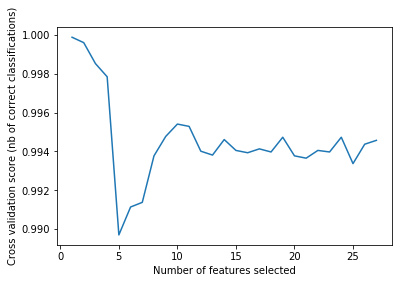

In [12]:
# 特征选择
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline
svc = SVC(kernel="linear")
dt = DecisionTreeClassifier()
rfecv = RFECV(estimator=dt, step=1, cv=StratifiedKFold(2), scoring='accuracy')
rfecv.fit(X_train, y_train)
print("Optimal number of features : %d" % rfecv.n_features_)
print("Ranking of features names: %s" % X_train.columns[rfecv.ranking_-1])
print("Ranking of features nums: %s" % rfecv.ranking_)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.savefig("feature.jpg")
plt.show()

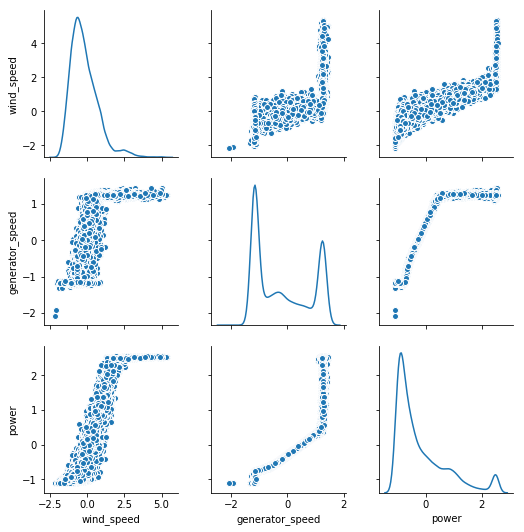

In [13]:
# 特征对比图
import seaborn as sns
sns.pairplot(X_train, vars=["wind_speed","generator_speed", "power"],
             palette="husl"
            ,diag_kind="kde")
plt.savefig("duibi.jpg")

In [16]:
# 网格搜索随机森林最佳参数 
def GridsearchCV():
    param_grid = [
        {
            'n_estimators':[i for i in range(500,510)],
            'oob_score':True,
            'random_state':[i for i in range(30,50)],
            'min_samples_split':[i for i in range(2,20)],
            'max_depth': [i for i in range(100,200)], 
        }]
    rf_clf = RandomForestClassifier(max_depth=146,n_estimators=500,
                                    max_leaf_nodes=2500, oob_score=True)
    grid_search = GridSearchCV(rf_clf, param_grid,n_jobs=-1)
    grid_search.fit(X,y)
    grid_search.best_score_
    grid_search.best_estimator_
    

In [15]:
# 寻参过程略。 这里直接使用固定参数的随机森林分类器
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(max_depth=146,n_estimators=2500, 
                                    max_leaf_nodes=2500, oob_score=True, random_state=30, n_jobs=-1)
rf_clf.fit(X_train, y_train)
y_predict = rf_clf.predict(X_test)
print(rf_clf.oob_score_)

0.9998005106926269


Confusion matrix, without normalization
[[11549     0]
 [    4   793]]


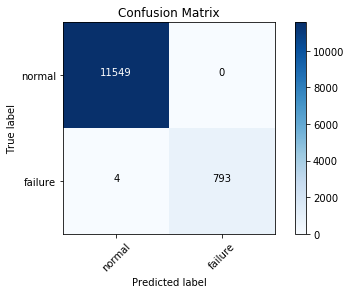

In [18]:
# 混淆矩阵
def plot_confusion_matrix(cm, classes, normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
    """
    Normalization can be applied by setting `normalize = True`.
    """
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
    print(cm)
    
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j, i, cm[i,j],
                horizontalalignment="center",
                color="white" if cm[i,j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig("matrix.jpg")
    
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

prediction = rf_clf.predict(X_test)
cm = confusion_matrix(y_test, prediction)
cm_plot_labels = ['normal', 'failure']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

In [19]:
# 评价
#precision & recall & f1-score
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test, y_pred=prediction))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     11549
          1       1.00      0.99      1.00       797

avg / total       1.00      1.00      1.00     12346

